# Import packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
import datetime
import geopandas as gpd
from shapely.geometry import Point, Polygon
import dask.dataframe as dd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#EDA

Import data for one month of NYC Taxi and Limousine Commison (TLC)

January 2025 TLC file

In [4]:
eda_ddf = dd.read_parquet(['/content/drive/MyDrive/PHASE_5_PROJECT/U2025.parquet'])
eda_df = eda_ddf.compute()
eda_df

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2025-01-01 00:28:07,2025-01-01 00:31:17,2025-01-01 00:33:25,2025-01-01 00:54:24,148,211,1.320,...,1.50,2.75,0.0,0.0,15.71,N,N,N,N,N
1,HV0005,B03406,<NA>,2025-01-01 00:18:33,NaT,2025-01-01 00:29:49,2025-01-01 00:41:52,127,244,3.313,...,1.51,0.00,0.0,0.0,23.57,N,N,N,N,N
2,HV0003,B03404,B03404,2025-01-01 00:28:22,2025-01-01 00:31:52,2025-01-01 00:32:39,2025-01-01 01:20:33,132,181,13.430,...,3.80,0.00,2.5,0.0,47.75,N,N,N,N,N
3,HV0003,B03404,B03404,2025-01-01 00:27:13,2025-01-01 00:33:58,2025-01-01 00:34:55,2025-01-01 00:39:19,76,76,0.820,...,1.08,0.00,0.0,0.0,12.20,N,N,N,N,N
4,HV0003,B03404,B03404,2025-01-01 00:33:29,2025-01-01 00:45:46,2025-01-01 00:46:19,2025-01-01 00:53:56,76,76,1.610,...,1.76,0.00,0.0,0.0,17.67,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3628445,HV0003,B03404,B03404,2025-01-31 23:45:39,2025-01-31 23:51:13,2025-01-31 23:51:52,2025-01-31 23:55:59,45,148,0.470,...,2.49,2.75,0.0,0.0,17.66,N,N,N,N,N
3628446,HV0003,B03404,B03404,2025-01-31 23:06:19,2025-01-31 23:08:27,2025-01-31 23:10:28,2025-01-31 23:29:36,235,242,6.360,...,1.55,0.00,0.0,0.0,19.80,N,N,N,N,N
3628447,HV0003,B03404,B03404,2025-01-31 23:25:48,2025-01-31 23:30:47,2025-01-31 23:31:24,2025-01-31 23:48:23,242,235,5.280,...,1.68,0.00,0.0,0.0,17.08,N,N,N,N,N
3628448,HV0003,B03404,B03404,2025-01-31 23:48:59,2025-01-31 23:55:45,2025-01-31 23:57:06,2025-02-01 00:04:35,235,235,0.830,...,1.04,0.00,0.0,1.0,6.79,N,N,N,N,N


Reduce the row count from 20 million to 1 million

In [5]:
mini_eda_df= eda_df.sample(frac=.05, random_state=42)
mini_eda_df

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
2707637,HV0003,B03404,B03404,2025-01-05 11:33:26,2025-01-05 11:33:39,2025-01-05 11:34:58,2025-01-05 11:54:18,163,144,3.450,...,2.56,2.75,0.0,0.00,15.96,N,N,N,N,N
1762921,HV0003,B03404,B03404,2025-01-16 22:52:08,2025-01-16 22:55:45,2025-01-16 22:55:59,2025-01-16 23:33:40,155,265,19.010,...,4.72,0.00,0.0,4.00,50.22,N,N,N,N,N
3943151,HV0003,B03404,B03404,2025-01-19 23:09:59,2025-01-19 23:27:05,2025-01-19 23:28:09,2025-01-19 23:41:19,106,14,5.950,...,1.66,0.00,0.0,4.18,16.92,N,N,N,N,N
6097672,HV0005,B03406,<NA>,2025-01-23 10:50:08,NaT,2025-01-23 10:53:50,2025-01-23 11:10:11,180,95,3.467,...,1.58,0.00,0.0,0.00,15.64,N,N,N,N,Y
3332466,HV0005,B03406,<NA>,2025-01-19 01:35:56,NaT,2025-01-19 01:44:22,2025-01-19 01:47:21,91,72,0.508,...,0.71,0.00,0.0,0.00,5.47,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036411,HV0003,B03404,B03404,2025-01-09 08:00:19,2025-01-09 08:05:19,2025-01-09 08:05:37,2025-01-09 08:16:15,136,94,1.380,...,1.11,0.00,0.0,0.00,10.63,N,N,N,N,N
4331130,HV0005,B03406,<NA>,2025-01-08 07:14:40,NaT,2025-01-08 07:16:25,2025-01-08 07:26:24,246,230,1.414,...,1.01,2.75,0.0,0.00,7.78,N,N,N,N,N
1816595,HV0003,B03404,B03404,2025-01-04 00:45:25,2025-01-04 00:49:12,2025-01-04 00:51:14,2025-01-04 01:10:45,35,132,5.970,...,1.81,0.00,0.0,0.00,23.50,N,N,N,N,Y
3230322,HV0003,B03404,B03404,2025-01-18 22:41:55,2025-01-18 22:44:22,2025-01-18 22:44:42,2025-01-18 22:58:43,229,238,2.780,...,1.19,2.75,0.0,0.00,12.12,N,N,N,N,N


Import table containg taxi zones corresponding to LocationID and Borough

In [7]:
zone_lookup = pd.read_csv('/content/drive/MyDrive/PHASE_5_PROJECT/taxi_zone_lookup.csv')
zone_lookup

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN


Merge TLC table with taxi zone table to include borough

In [8]:
pickup = zone_lookup[['Borough', 'LocationID']].copy()
pickup.columns= ['pickup_borough','PULocationID',]
dropoff = zone_lookup[['Borough', 'LocationID']].copy()
dropoff.columns =['dropoff_borough', 'DOLocationID',]
df_merged = pd.merge(
            mini_eda_df,
            pickup,
            on = 'PULocationID',
            how = 'left'
)

df_merged = pd.merge(
            df_merged,
            dropoff,
            on = 'DOLocationID',
            how = 'left'
)
df_merged

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,pickup_borough,dropoff_borough
0,HV0003,B03404,B03404,2025-01-05 11:33:26,2025-01-05 11:33:39,2025-01-05 11:34:58,2025-01-05 11:54:18,163,144,3.450,...,0.0,0.00,15.96,N,N,N,N,N,Manhattan,Manhattan
1,HV0003,B03404,B03404,2025-01-16 22:52:08,2025-01-16 22:55:45,2025-01-16 22:55:59,2025-01-16 23:33:40,155,265,19.010,...,0.0,4.00,50.22,N,N,N,N,N,Brooklyn,NaN
2,HV0003,B03404,B03404,2025-01-19 23:09:59,2025-01-19 23:27:05,2025-01-19 23:28:09,2025-01-19 23:41:19,106,14,5.950,...,0.0,4.18,16.92,N,N,N,N,N,Brooklyn,Brooklyn
3,HV0005,B03406,<NA>,2025-01-23 10:50:08,NaT,2025-01-23 10:53:50,2025-01-23 11:10:11,180,95,3.467,...,0.0,0.00,15.64,N,N,N,N,Y,Queens,Queens
4,HV0005,B03406,<NA>,2025-01-19 01:35:56,NaT,2025-01-19 01:44:22,2025-01-19 01:47:21,91,72,0.508,...,0.0,0.00,5.47,N,N,N,N,N,Brooklyn,Brooklyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020278,HV0003,B03404,B03404,2025-01-09 08:00:19,2025-01-09 08:05:19,2025-01-09 08:05:37,2025-01-09 08:16:15,136,94,1.380,...,0.0,0.00,10.63,N,N,N,N,N,Bronx,Bronx
1020279,HV0005,B03406,<NA>,2025-01-08 07:14:40,NaT,2025-01-08 07:16:25,2025-01-08 07:26:24,246,230,1.414,...,0.0,0.00,7.78,N,N,N,N,N,Manhattan,Manhattan
1020280,HV0003,B03404,B03404,2025-01-04 00:45:25,2025-01-04 00:49:12,2025-01-04 00:51:14,2025-01-04 01:10:45,35,132,5.970,...,0.0,0.00,23.50,N,N,N,N,Y,Brooklyn,Queens
1020281,HV0003,B03404,B03404,2025-01-18 22:41:55,2025-01-18 22:44:22,2025-01-18 22:44:42,2025-01-18 22:58:43,229,238,2.780,...,0.0,0.00,12.12,N,N,N,N,N,Manhattan,Manhattan


Filter for only Manhattan pickup and dropoff locations

In [9]:
manhattan_df = df_merged[(df_merged['pickup_borough'] == 'Manhattan') & (df_merged['dropoff_borough'] == 'Manhattan')].drop(columns=['pickup_borough','dropoff_borough'],axis=1)
manhattan_df

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2025-01-05 11:33:26,2025-01-05 11:33:39,2025-01-05 11:34:58,2025-01-05 11:54:18,163,144,3.450,...,2.56,2.75,0.0,0.0,15.96,N,N,N,N,N
12,HV0003,B03404,B03404,2025-01-23 16:25:22,2025-01-23 16:31:13,2025-01-23 16:31:43,2025-01-23 16:39:55,140,229,1.240,...,1.14,2.75,0.0,0.0,6.47,N,N,N,N,N
13,HV0003,B03404,B03404,2025-01-11 05:25:57,2025-01-11 05:27:49,2025-01-11 05:29:50,2025-01-11 05:39:18,229,163,1.260,...,1.26,2.75,0.0,0.0,8.41,N,N,N,N,N
21,HV0003,B03404,B03404,2025-01-03 17:55:28,2025-01-03 17:56:01,2025-01-03 17:58:02,2025-01-03 18:04:08,125,231,1.030,...,0.95,2.75,0.0,0.0,10.07,N,N,N,N,N
28,HV0005,B03406,<NA>,2025-01-08 14:29:58,NaT,2025-01-08 14:31:28,2025-01-08 14:48:47,13,211,1.985,...,2.82,2.75,0.0,5.0,31.40,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020269,HV0005,B03406,<NA>,2025-01-09 11:55:12,NaT,2025-01-09 11:58:25,2025-01-09 12:09:40,263,236,0.985,...,0.76,2.75,0.0,1.0,7.93,N,N,N,N,N
1020272,HV0003,B03404,B03404,2025-01-18 23:12:27,2025-01-18 23:15:36,2025-01-18 23:15:44,2025-01-18 23:27:03,90,79,1.550,...,1.19,2.75,0.0,0.0,8.71,N,N,N,N,N
1020277,HV0003,B03404,B03404,2025-01-08 07:38:12,2025-01-08 07:42:05,2025-01-08 07:42:25,2025-01-08 08:07:23,229,263,2.110,...,1.85,2.75,0.0,0.0,17.43,N,N,N,N,N
1020279,HV0005,B03406,<NA>,2025-01-08 07:14:40,NaT,2025-01-08 07:16:25,2025-01-08 07:26:24,246,230,1.414,...,1.01,2.75,0.0,0.0,7.78,N,N,N,N,N


Remove base fares equal to zero

In [11]:
manhattan_df_2 = manhattan_df[manhattan_df['base_passenger_fare'] != 0]

In [15]:
pricing_df_all =manhattan_df_2['base_passenger_fare'].sort_values(ascending=False)

<Axes: xlabel='base_passenger_fare', ylabel='trip_miles'>

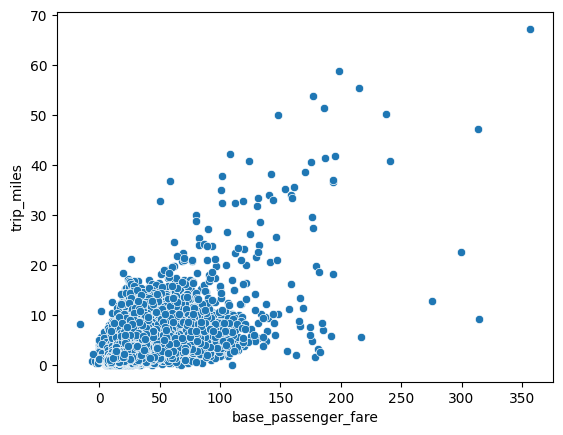

In [12]:
sns.scatterplot(data=manhattan_df_2, x = 'base_passenger_fare', y= 'trip_miles')

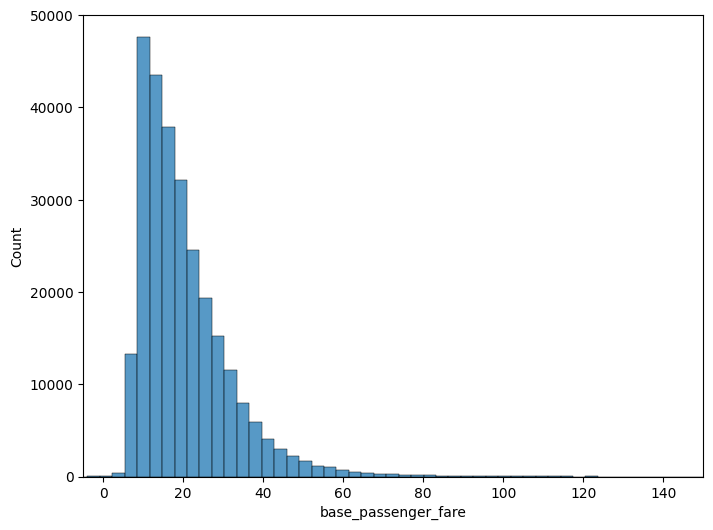

In [29]:
plt.figure(figsize=(8,6))
sns.histplot(pricing_df_all, bins=120)

plt.xlim(-5,150)
plt.show()

In [ ]:
#Drop all rows with passenger fares below 5

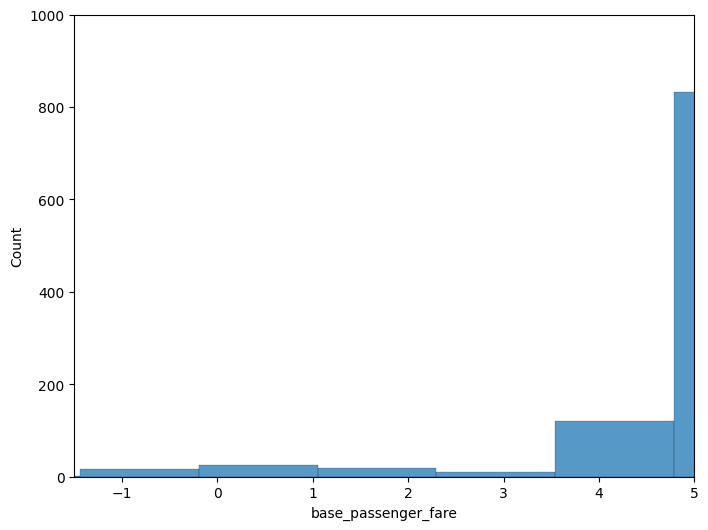

In [27]:
plt.figure(figsize=(8,6))
sns.histplot(pricing_df_all, bins=300)

plt.xlim(-1.5,5)
plt.ylim(0,1000)
plt.show()

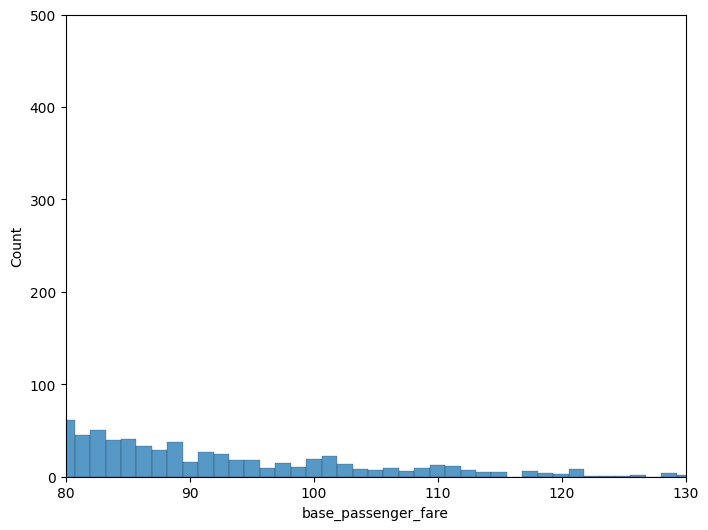

In [31]:
plt.figure(figsize=(8,6))
sns.histplot(pricing_df_all, bins=300)

plt.xlim(80,130)
plt.ylim(0,500)
plt.show()

Drop rows contianing base fares under 5 and over 120

In [32]:
manhattan_df_3 = manhattan_df_2[(manhattan_df_2['base_passenger_fare'] > 5) & (manhattan_df_2['base_passenger_fare'] < 120)]

In [33]:
manhattan_df_3['base_passenger_fare'].describe()

,base_passenger_fare
count,275339.000000
mean,20.248496
std,11.241745
min,5.010000
25%,12.180000
50%,17.380000
75%,25.230000
max,119.680000


Remove rows that where the bae fare is over 100 and the pickup and dropoff location is the same

In [38]:
manhattan_df_4 = manhattan_df_3[(manhattan_df_3['base_passenger_fare'] <100) & (manhattan_df_3['PULocationID'] != manhattan_df_3['DOLocationID'])]

In [39]:
manhattan_df_4.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag'],
      dtype='object')

In [40]:
manhattan_df_4.isna().sum()

,0
hvfhs_license_num,0
dispatching_base_num,0
originating_base_num,72518
request_datetime,0
on_scene_datetime,72518
pickup_datetime,0
dropoff_datetime,0
PULocationID,0
DOLocationID,0
trip_miles,0


In [41]:
manhattan_df_4.dropna()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2025-01-05 11:33:26,2025-01-05 11:33:39,2025-01-05 11:34:58,2025-01-05 11:54:18,163,144,3.45,...,2.56,2.75,0.0,0.0,15.96,N,N,N,N,N
12,HV0003,B03404,B03404,2025-01-23 16:25:22,2025-01-23 16:31:13,2025-01-23 16:31:43,2025-01-23 16:39:55,140,229,1.24,...,1.14,2.75,0.0,0.0,6.47,N,N,N,N,N
13,HV0003,B03404,B03404,2025-01-11 05:25:57,2025-01-11 05:27:49,2025-01-11 05:29:50,2025-01-11 05:39:18,229,163,1.26,...,1.26,2.75,0.0,0.0,8.41,N,N,N,N,N
21,HV0003,B03404,B03404,2025-01-03 17:55:28,2025-01-03 17:56:01,2025-01-03 17:58:02,2025-01-03 18:04:08,125,231,1.03,...,0.95,2.75,0.0,0.0,10.07,N,N,N,N,N
43,HV0003,B03404,B03404,2025-01-28 20:29:16,2025-01-28 20:29:59,2025-01-28 20:30:21,2025-01-28 20:42:26,246,163,2.05,...,4.64,2.75,0.0,0.0,25.85,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020267,HV0003,B03404,B03404,2025-01-15 03:00:03,2025-01-15 03:02:37,2025-01-15 03:02:52,2025-01-15 03:19:10,79,42,7.61,...,1.91,2.75,0.0,0.0,20.19,N,N,N,N,N
1020268,HV0003,B03404,B03404,2025-01-17 14:03:49,2025-01-17 14:09:38,2025-01-17 14:09:57,2025-01-17 14:14:47,68,249,0.62,...,0.88,2.75,0.0,0.0,4.28,N,N,N,N,N
1020272,HV0003,B03404,B03404,2025-01-18 23:12:27,2025-01-18 23:15:36,2025-01-18 23:15:44,2025-01-18 23:27:03,90,79,1.55,...,1.19,2.75,0.0,0.0,8.71,N,N,N,N,N
1020277,HV0003,B03404,B03404,2025-01-08 07:38:12,2025-01-08 07:42:05,2025-01-08 07:42:25,2025-01-08 08:07:23,229,263,2.11,...,1.85,2.75,0.0,0.0,17.43,N,N,N,N,N


Filter for 'HV0003' in hvfhs_license_num column as this is the desingated number for Ubers

In [43]:
manhattan_df_4['hvfhs_license_num'].value_counts()

,count
hvfhs_license_num,
HV0003,191029
HV0005,72688


In [44]:
temp_df_1 = manhattan_df_4.loc[manhattan_df_4['hvfhs_license_num']=='HV0003']

In [ ]:
#Filter out shared rides (Both those where the request was fufilled as the price is the same for both)

Filter out shared rides (Both those where the request was requested and fufilled as the price is the same for both)

In [45]:
ddf_temp_2 = temp_df_1[(temp_df_1['shared_match_flag'] == 'N')& (temp_df_1['shared_request_flag'] == 'N')]
ddf_temp_2.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2025-01-05 11:33:26,2025-01-05 11:33:39,2025-01-05 11:34:58,2025-01-05 11:54:18,163,144,3.45,...,2.56,2.75,0.0,0.0,15.96,N,N,N,N,N
12,HV0003,B03404,B03404,2025-01-23 16:25:22,2025-01-23 16:31:13,2025-01-23 16:31:43,2025-01-23 16:39:55,140,229,1.24,...,1.14,2.75,0.0,0.0,6.47,N,N,N,N,N
13,HV0003,B03404,B03404,2025-01-11 05:25:57,2025-01-11 05:27:49,2025-01-11 05:29:50,2025-01-11 05:39:18,229,163,1.26,...,1.26,2.75,0.0,0.0,8.41,N,N,N,N,N
21,HV0003,B03404,B03404,2025-01-03 17:55:28,2025-01-03 17:56:01,2025-01-03 17:58:02,2025-01-03 18:04:08,125,231,1.03,...,0.95,2.75,0.0,0.0,10.07,N,N,N,N,N
43,HV0003,B03404,B03404,2025-01-28 20:29:16,2025-01-28 20:29:59,2025-01-28 20:30:21,2025-01-28 20:42:26,246,163,2.05,...,4.64,2.75,0.0,0.0,25.85,N,N,N,N,N


In [46]:
ddf_temp_3 = ddf_temp_2.drop(columns=['shared_match_flag','shared_request_flag'])
ddf_temp_3.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2025-01-05 11:33:26,2025-01-05 11:33:39,2025-01-05 11:34:58,2025-01-05 11:54:18,163,144,3.45,...,0.0,0.76,2.56,2.75,0.0,0.0,15.96,N,N,N
12,HV0003,B03404,B03404,2025-01-23 16:25:22,2025-01-23 16:31:13,2025-01-23 16:31:43,2025-01-23 16:39:55,140,229,1.24,...,0.0,0.31,1.14,2.75,0.0,0.0,6.47,N,N,N
13,HV0003,B03404,B03404,2025-01-11 05:25:57,2025-01-11 05:27:49,2025-01-11 05:29:50,2025-01-11 05:39:18,229,163,1.26,...,0.0,0.35,1.26,2.75,0.0,0.0,8.41,N,N,N
21,HV0003,B03404,B03404,2025-01-03 17:55:28,2025-01-03 17:56:01,2025-01-03 17:58:02,2025-01-03 18:04:08,125,231,1.03,...,0.0,0.29,0.95,2.75,0.0,0.0,10.07,N,N,N
43,HV0003,B03404,B03404,2025-01-28 20:29:16,2025-01-28 20:29:59,2025-01-28 20:30:21,2025-01-28 20:42:26,246,163,2.05,...,0.0,1.40,4.64,2.75,0.0,0.0,25.85,N,N,N


Analyzing the access_a_ride_flag column which is based off of people who have thier rides subsidized by the MTA

In [47]:
ddf_temp_3['access_a_ride_flag'].value_counts()

,count
access_a_ride_flag,
N,184827
Y,113


The subsidized fare is about $2.50 so this means that the base fare incldued here is the total price paid to Uber

In [48]:
ddf_temp_3[ddf_temp_3['access_a_ride_flag'] == 'Y']['base_passenger_fare'].median()

25.37

In [49]:
ddf_temp_3[ddf_temp_3['access_a_ride_flag'] == 'Y']['trip_miles'].median()

3.25

In [50]:
ddf_temp_3[ddf_temp_3['access_a_ride_flag'] == 'N']['base_passenger_fare'].median()

18.82

In [51]:
ddf_temp_3[ddf_temp_3['access_a_ride_flag'] == 'N']['trip_miles'].median()

1.91

In [52]:
ddf_temp_3[(ddf_temp_3['access_a_ride_flag'] == 'Y') & (ddf_temp_3['trip_miles']  < 2)& (ddf_temp_3['trip_miles']  > 1)]['base_passenger_fare'].describe()

,base_passenger_fare
count,22.000000
mean,15.406818
std,7.978496
min,7.970000
25%,10.795000
50%,12.470000
75%,15.685000
max,36.050000


In [53]:
ddf_temp_3[(ddf_temp_3['access_a_ride_flag'] == 'N') & (ddf_temp_3['trip_miles']  < 2)& (ddf_temp_3['trip_miles']  > 1)]['base_passenger_fare'].describe()

,base_passenger_fare
count,70120.000000
mean,16.816903
std,7.417686
min,5.010000
25%,11.900000
50%,14.940000
75%,19.182500
max,95.670000


In [54]:
ddf_temp_3[(ddf_temp_3['access_a_ride_flag'] == 'Y')]['PULocationID'].value_counts()[:10]

,count
PULocationID,
74,8
90,8
41,6
68,6
238,5
161,4
244,4
166,4
148,4


In [55]:
ddf_temp_3[(ddf_temp_3['access_a_ride_flag'] == 'N')]['PULocationID'].value_counts()[:10]

,count
PULocationID,
161,6322
234,5915
230,5909
79,5873
231,5752
246,5670
68,5189
249,4868
237,4735


The rides that are subsidized by the MTA may be important to keep as they provide addtional data and have roughlt the same base fare

In [56]:
ddf_temp_3

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2025-01-05 11:33:26,2025-01-05 11:33:39,2025-01-05 11:34:58,2025-01-05 11:54:18,163,144,3.45,...,0.0,0.76,2.56,2.75,0.0,0.0,15.96,N,N,N
12,HV0003,B03404,B03404,2025-01-23 16:25:22,2025-01-23 16:31:13,2025-01-23 16:31:43,2025-01-23 16:39:55,140,229,1.24,...,0.0,0.31,1.14,2.75,0.0,0.0,6.47,N,N,N
13,HV0003,B03404,B03404,2025-01-11 05:25:57,2025-01-11 05:27:49,2025-01-11 05:29:50,2025-01-11 05:39:18,229,163,1.26,...,0.0,0.35,1.26,2.75,0.0,0.0,8.41,N,N,N
21,HV0003,B03404,B03404,2025-01-03 17:55:28,2025-01-03 17:56:01,2025-01-03 17:58:02,2025-01-03 18:04:08,125,231,1.03,...,0.0,0.29,0.95,2.75,0.0,0.0,10.07,N,N,N
43,HV0003,B03404,B03404,2025-01-28 20:29:16,2025-01-28 20:29:59,2025-01-28 20:30:21,2025-01-28 20:42:26,246,163,2.05,...,0.0,1.40,4.64,2.75,0.0,0.0,25.85,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020267,HV0003,B03404,B03404,2025-01-15 03:00:03,2025-01-15 03:02:37,2025-01-15 03:02:52,2025-01-15 03:19:10,79,42,7.61,...,0.0,0.55,1.91,2.75,0.0,0.0,20.19,N,N,N
1020268,HV0003,B03404,B03404,2025-01-17 14:03:49,2025-01-17 14:09:38,2025-01-17 14:09:57,2025-01-17 14:14:47,68,249,0.62,...,0.0,0.23,0.88,2.75,0.0,0.0,4.28,N,N,N
1020272,HV0003,B03404,B03404,2025-01-18 23:12:27,2025-01-18 23:15:36,2025-01-18 23:15:44,2025-01-18 23:27:03,90,79,1.55,...,0.0,0.33,1.19,2.75,0.0,0.0,8.71,N,N,N
1020277,HV0003,B03404,B03404,2025-01-08 07:38:12,2025-01-08 07:42:05,2025-01-08 07:42:25,2025-01-08 08:07:23,229,263,2.11,...,0.0,0.53,1.85,2.75,0.0,0.0,17.43,N,N,N


In [57]:
ddf_temp_3['wav_request_flag'].value_counts()

,count
wav_request_flag,
N,184451
Y,489


In [58]:
ddf_temp_3['wav_match_flag'].value_counts()

,count
wav_match_flag,
N,162608
Y,22332


Keep both wav_request_flag features

In [60]:
ddf_temp_3[ddf_temp_3['wav_request_flag'] == 'Y']['base_passenger_fare'].median()

18.01

In [63]:
ddf_temp_3[ddf_temp_3['wav_request_flag'] == 'N']['base_passenger_fare'].median()

18.82

In [62]:
ddf_temp_3[ddf_temp_3['wav_match_flag'] == 'Y']['base_passenger_fare'].median()

17.36

In [61]:
ddf_temp_3[ddf_temp_3['wav_match_flag'] == 'N']['base_passenger_fare'].median()

19.01

# Prepare data for model

Upload a years worth of data of TLC paraquet files between Febuarary 2024 and January 2025

In [86]:
paths=['/content/drive/MyDrive/PHASE_5_PROJECT/Feb_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Mar_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Apr_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/May_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Jun_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Jul_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Aug_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Sep_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Oct_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Nov_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Dec_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/U2025.parquet']
ddf_24 = dd.read_parquet(paths)

In [87]:
ddf_24['PULocationID'] = ddf_24['PULocationID'].astype('int64')
ddf_24['DOLocationID'] = ddf_24['DOLocationID'].astype('int64')
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype('int64')
pickup = zone_lookup[['Borough', 'LocationID', 'Zone']].copy()
pickup.columns= ['pickup_borough','PULocationID','pickup_zone']
dropoff = zone_lookup[['Borough', 'LocationID', 'Zone']].copy()
dropoff.columns =['dropoff_borough', 'DOLocationID','dropoff_zone']
merged_ddf = ddf_24.merge(
            pickup,
            on = 'PULocationID',
            how = 'left'
)

merged_ddf = merged_ddf.merge(
            dropoff,
            on = 'DOLocationID',
            how = 'left'
)


In [88]:
print(ddf_24['PULocationID'].dtype)

int64


In [89]:
print(pickup['PULocationID'].dtype)

int64


In [90]:
print(merged_ddf.columns)

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'pickup_borough', 'pickup_zone',
       'dropoff_borough', 'dropoff_zone'],
      dtype='object')


Replicate cleaning done above

In [91]:
ddf_manhattan = merged_ddf[(merged_ddf['pickup_borough'] == 'Manhattan') & (merged_ddf['dropoff_borough'] == 'Manhattan')]

In [92]:
ddf_manhattan_2 = ddf_manhattan.drop(columns=['pickup_borough', 'dropoff_borough'], axis=1)

In [93]:
ddf_manhattan_3 = ddf_manhattan_2[ddf_manhattan_2['base_passenger_fare'] != 0]

In [94]:
ddf_manhattan_4 = ddf_manhattan_3[(ddf_manhattan_3['base_passenger_fare'] > 5) & (ddf_manhattan_3['base_passenger_fare'] < 120)]

In [95]:
ddf_manhattan_5 = ddf_manhattan_4[(ddf_manhattan_4['base_passenger_fare'] <100) & (ddf_manhattan_4['PULocationID'] != ddf_manhattan_4['DOLocationID'])]

In [96]:
ddf_2024 = ddf_manhattan_5.loc[ddf_manhattan_5['hvfhs_license_num']=='HV0003']

In [97]:
ddf_temp = ddf_2024.loc[ddf_2024['shared_match_flag'] == 'N']

In [98]:
ddf_temp_2= ddf_temp.loc[ddf_temp['shared_request_flag'] == 'N']

In [99]:
ddf_temp_3 = ddf_temp_2.loc[(ddf_temp_2['PULocationID'] < 265) & (ddf_temp_2['DOLocationID'] < 265)]

Roughly 180 million rows, need to sample

In [100]:
ddf_sam = ddf_temp_3.sample(frac=.03, random_state=42)

In [101]:
df_2024 = ddf_sam.compute()


In [102]:
df_2024.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'pickup_zone', 'dropoff_zone'],
      dtype='object')

In [103]:
df_24_Cl = df_2024.drop(columns=['hvfhs_license_num','dispatching_base_num','originating_base_num','shared_request_flag','shared_match_flag','access_a_ride_flag','wav_request_flag','wav_match_flag','tips','driver_pay'], axis =1)

In [104]:
df_24_Cl

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,pickup_zone,dropoff_zone
1118505,2024-04-05 08:41:35,2024-04-05 08:43:58,2024-04-05 08:45:46,2024-04-05 08:59:16,231,113,1.73,810,19.35,0.0,0.57,1.83,2.75,0.0,TriBeCa/Civic Center,Greenwich Village North
1075156,2024-04-05 01:15:17,2024-04-05 01:16:22,2024-04-05 01:18:22,2024-04-05 01:25:26,162,236,1.46,424,9.67,0.0,0.28,0.91,2.75,0.0,Midtown East,Upper East Side North
2506900,2024-04-10 17:56:28,2024-04-10 18:00:09,2024-04-10 18:00:50,2024-04-10 18:06:07,41,24,0.44,317,7.69,0.0,0.21,0.68,0.00,0.0,Central Harlem,Bloomingdale
2707255,2024-04-11 15:22:38,2024-04-11 15:25:49,2024-04-11 15:26:47,2024-04-11 15:33:54,41,42,0.99,427,6.49,0.0,0.18,0.58,0.00,0.0,Central Harlem,Central Harlem North
2380842,2024-04-10 08:25:40,2024-04-10 08:26:15,2024-04-10 08:27:29,2024-04-10 08:50:41,229,151,4.00,1392,19.93,0.0,0.55,1.77,2.75,0.0,Sutton Place/Turtle Bay North,Manhattan Valley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282792,2025-01-31 16:56:48,2025-01-31 17:01:23,2025-01-31 17:01:56,2025-01-31 17:11:43,244,243,1.16,587,12.30,0.0,0.34,1.10,0.00,0.0,Washington Heights South,Washington Heights North
1252512,2025-01-31 15:19:45,2025-01-31 15:23:22,2025-01-31 15:24:04,2025-01-31 15:28:25,166,116,1.36,261,10.75,0.0,0.30,0.96,0.00,0.0,Morningside Heights,Hamilton Heights
936316,2025-01-30 11:59:34,2025-01-30 12:01:43,2025-01-30 12:03:44,2025-01-30 12:23:35,239,237,2.00,1191,21.60,0.0,0.59,1.92,2.75,0.0,Upper West Side South,Upper East Side South
191627,2025-01-27 08:37:27,2025-01-27 08:39:36,2025-01-27 08:41:36,2025-01-27 09:17:17,74,68,6.56,2141,37.83,0.0,1.06,3.55,2.75,0.0,East Harlem North,East Chelsea


In [105]:
df_24_Cl['base_passenger_fare'].sort_values()[20:50]

,base_passenger_fare
2509388,5.03
2998355,5.04
2117185,5.04
270190,5.04
2043179,5.04
3085981,5.04
101271,5.04
1361766,5.04
2012266,5.04
323850,5.04


In [106]:
df_24_Cl['tolls'].sort_values(ascending=False)[400:425]

,tolls
1159443,16.94
197379,16.94
723683,16.94
2192496,16.94
1745258,16.94
1593360,16.94
587499,16.94
671009,16.94
139157,16.94
2525307,16.94


In [107]:
df_24_Cl.iloc[0]

,1118505
request_datetime,2024-04-05 08:41:35
on_scene_datetime,2024-04-05 08:43:58
pickup_datetime,2024-04-05 08:45:46
dropoff_datetime,2024-04-05 08:59:16
PULocationID,231
DOLocationID,113
trip_miles,1.73
trip_time,810
base_passenger_fare,19.35
tolls,0.0


In [108]:
# Removing rows for trips that started or ended outside of NYC

In [109]:
#df_24_Cl = df_24_Upd.loc[(df_24_Upd['PULocationID'] < 265) & (df_24_Upd['DOLocationID'] < 265)]

In [110]:
df_24_Cl['sales_tax'].isna().sum()

np.int64(0)

In [111]:
df_24_Cl['total_fare'] = (df_24_Cl['base_passenger_fare']) + (df_24_Cl['tolls']) + (df_24_Cl['bcf']) + (df_24_Cl['sales_tax']) + (df_24_Cl['congestion_surcharge'])+ (df_24_Cl['airport_fee'])

In [112]:
#Had to take out Datetime becasue keras couldnt use. converted to day of week

In [113]:
df_24_Cl

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,pickup_zone,dropoff_zone,total_fare
1118505,2024-04-05 08:41:35,2024-04-05 08:43:58,2024-04-05 08:45:46,2024-04-05 08:59:16,231,113,1.73,810,19.35,0.0,0.57,1.83,2.75,0.0,TriBeCa/Civic Center,Greenwich Village North,24.50
1075156,2024-04-05 01:15:17,2024-04-05 01:16:22,2024-04-05 01:18:22,2024-04-05 01:25:26,162,236,1.46,424,9.67,0.0,0.28,0.91,2.75,0.0,Midtown East,Upper East Side North,13.61
2506900,2024-04-10 17:56:28,2024-04-10 18:00:09,2024-04-10 18:00:50,2024-04-10 18:06:07,41,24,0.44,317,7.69,0.0,0.21,0.68,0.00,0.0,Central Harlem,Bloomingdale,8.58
2707255,2024-04-11 15:22:38,2024-04-11 15:25:49,2024-04-11 15:26:47,2024-04-11 15:33:54,41,42,0.99,427,6.49,0.0,0.18,0.58,0.00,0.0,Central Harlem,Central Harlem North,7.25
2380842,2024-04-10 08:25:40,2024-04-10 08:26:15,2024-04-10 08:27:29,2024-04-10 08:50:41,229,151,4.00,1392,19.93,0.0,0.55,1.77,2.75,0.0,Sutton Place/Turtle Bay North,Manhattan Valley,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282792,2025-01-31 16:56:48,2025-01-31 17:01:23,2025-01-31 17:01:56,2025-01-31 17:11:43,244,243,1.16,587,12.30,0.0,0.34,1.10,0.00,0.0,Washington Heights South,Washington Heights North,13.74
1252512,2025-01-31 15:19:45,2025-01-31 15:23:22,2025-01-31 15:24:04,2025-01-31 15:28:25,166,116,1.36,261,10.75,0.0,0.30,0.96,0.00,0.0,Morningside Heights,Hamilton Heights,12.01
936316,2025-01-30 11:59:34,2025-01-30 12:01:43,2025-01-30 12:03:44,2025-01-30 12:23:35,239,237,2.00,1191,21.60,0.0,0.59,1.92,2.75,0.0,Upper West Side South,Upper East Side South,26.86
191627,2025-01-27 08:37:27,2025-01-27 08:39:36,2025-01-27 08:41:36,2025-01-27 09:17:17,74,68,6.56,2141,37.83,0.0,1.06,3.55,2.75,0.0,East Harlem North,East Chelsea,45.19


In [114]:
df_24_Cl['pickup_year'] = df_24_Cl['pickup_datetime'].dt.year.astype(int)
df_24_Cl['pickup_month'] = df_24_Cl['pickup_datetime'].dt.month.astype(int)
df_24_Cl['pickup_day'] = df_24_Cl['pickup_datetime'].dt.day.astype(int)
df_24_Cl['pickup_hour'] = df_24_Cl['pickup_datetime'].dt.hour.astype(int)
df_24_Cl['pickup_minute'] = df_24_Cl['pickup_datetime'].dt.minute.astype(int)
df_24_Cl['pickup_second'] = df_24_Cl['pickup_datetime'].dt.second.astype(int)


df_24_Cl['request_year'] = df_24_Cl['request_datetime'].dt.year.astype(int)
df_24_Cl['request_month'] = df_24_Cl['request_datetime'].dt.month.astype(int)
df_24_Cl['request_day'] = df_24_Cl['request_datetime'].dt.day.astype(int)
df_24_Cl['request_hour'] = df_24_Cl['request_datetime'].dt.hour.astype(int)
df_24_Cl['request_minute'] = df_24_Cl['request_datetime'].dt.minute.astype(int)
df_24_Cl['request_second'] = df_24_Cl['request_datetime'].dt.second.astype(int)


df_24_Cl['on_scene_year'] = df_24_Cl['on_scene_datetime'].dt.year.astype(int)
df_24_Cl['on_scene_month'] = df_24_Cl['on_scene_datetime'].dt.month.astype(int)
df_24_Cl['on_scene_day'] = df_24_Cl['on_scene_datetime'].dt.day.astype(int)
df_24_Cl['on_scene_hour'] = df_24_Cl['on_scene_datetime'].dt.hour.astype(int)
df_24_Cl['on_scene_minute'] = df_24_Cl['on_scene_datetime'].dt.minute.astype(int)
df_24_Cl['on_scene_second'] = df_24_Cl['on_scene_datetime'].dt.second.astype(int)


df_24_Cl['dropoff_year'] = df_24_Cl['dropoff_datetime'].dt.year.astype(int)
df_24_Cl['dropoff_month'] = df_24_Cl['dropoff_datetime'].dt.month.astype(int)
df_24_Cl['dropoff_day'] = df_24_Cl['dropoff_datetime'].dt.day.astype(int)
df_24_Cl['dropoff_hour'] = df_24_Cl['dropoff_datetime'].dt.hour.astype(int)
df_24_Cl['dropoff_minute'] = df_24_Cl['dropoff_datetime'].dt.minute.astype(int)
df_24_Cl['dropoff_second'] = df_24_Cl['dropoff_datetime'].dt.second.astype(int)



In [115]:
df_base_model = df_24_Cl.drop(columns=['request_datetime',	'on_scene_datetime',	'pickup_datetime',	'dropoff_datetime','base_passenger_fare',	'tolls',	'bcf',	'sales_tax',	'congestion_surcharge',	'airport_fee'],axis=1)

In [116]:
df_base_model_1 = df_base_model.drop(columns=['pickup_zone', 'dropoff_zone'])

In [117]:
df_base_model_1.head()

,PULocationID,DOLocationID,trip_miles,trip_time,total_fare,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,...,on_scene_day,on_scene_hour,on_scene_minute,on_scene_second,dropoff_year,dropoff_month,dropoff_day,dropoff_hour,dropoff_minute,dropoff_second
1118505,231,113,1.73,810,24.50,2024,4,5,8,45,...,5,8,43,58,2024,4,5,8,59,16
1075156,162,236,1.46,424,13.61,2024,4,5,1,18,...,5,1,16,22,2024,4,5,1,25,26
2506900,41,24,0.44,317,8.58,2024,4,10,18,0,...,10,18,0,9,2024,4,10,18,6,7
2707255,41,42,0.99,427,7.25,2024,4,11,15,26,...,11,15,25,49,2024,4,11,15,33,54
2380842,229,151,4.00,1392,25.00,2024,4,10,8,27,...,10,8,26,15,2024,4,10,8,50,41


# Building Baseline Model

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, root_mean_squared_error, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam

In [120]:
model = Sequential()
model.add(Dense(40, input_dim=28, activation='relu'))
model.add(Dense(1, activation ='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [121]:
opt = Adam(learning_rate = 0.01, beta_1 = 0.9, beta_2 = 0.999 )
model.compile(loss = 'mean_squared_error', optimizer ='adam', metrics = ['root_mean_squared_error','mean_absolute_error'])

In [122]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 40)                  │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,201 (4.69 KB)

 Trainable params: 1,201 (4.69 KB)

 Non-trainable params: 0 (0.00 B)

In [123]:
X = df_base_model_1.drop(columns=['total_fare'], axis=1)
y = df_base_model_1['total_fare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [124]:
from tensorflow.keras.callbacks import EarlyStopping
trainCallback = EarlyStopping(monitor='val_loss', min_delta = 1e-4, patience = 10)

In [125]:
history = model.fit(X_train, y_train, epochs=50, batch_size=512, validation_split=.2, callbacks=[trainCallback])

Epoch 1/50
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 83149.1562 - mean_absolute_error: 99.7872 - root_mean_squared_error: 231.8236 - val_loss: 103.5419 - val_mean_absolute_error: 6.6103 - val_root_mean_squared_error: 10.1756
Epoch 2/50
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 101.9481 - mean_absolute_error: 6.9019 - root_mean_squared_error: 10.0969 - val_loss: 99.8321 - val_mean_absolute_error: 6.6471 - val_root_mean_squared_error: 9.9916
Epoch 3/50
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 100.9341 - mean_absolute_error: 6.8496 - root_mean_squared_error: 10.0466 - val_loss: 99.8823 - val_mean_absolute_error: 7.0493 - val_root_mean_squared_error: 9.9941
Epoch 4/50
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 101.7055 - mean_absolute_error: 6.8833 - root_mean_squared_error: 10.0847 - val_loss: 98.8947 - val_mean_absolute_error: 6.7508 - val_root_mean_squared_error: 9.9446
Epoch 5/50
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 101.6369 - mean_abso

In [126]:
model.save('/content/drive/MyDrive/baseline_model_3.keras')

In [127]:
y_pred = model.predict(X_test).flatten()

6245/6245 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


(0.0, 150.0)

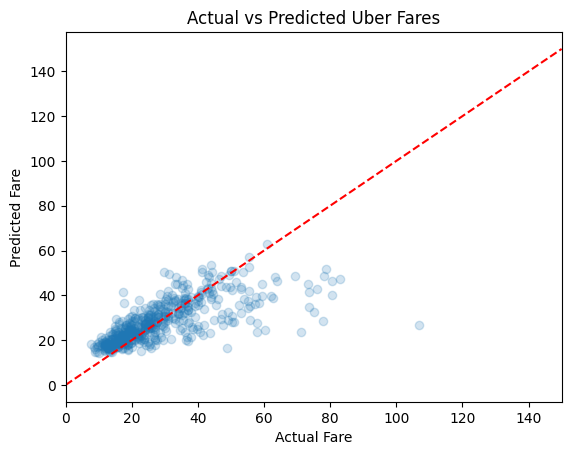

In [128]:
plt.scatter(y_test[:500], y_pred[:500], alpha=0.2)
plt.plot([0,150],[0,150], 'r--')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Uber Fares")
plt.xlim(0,150)

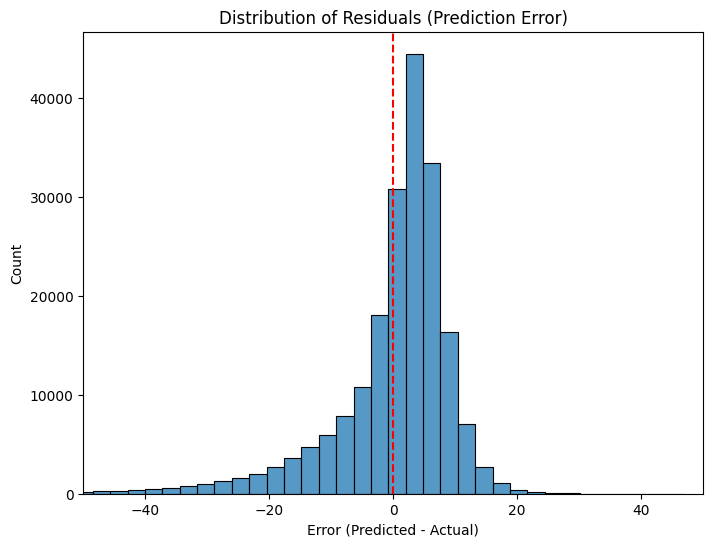

In [132]:
residuals = y_pred - y_test
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=50)
plt.axvline(0, color='red', linestyle='--')
plt.title("Distribution of Residuals (Prediction Error)")
plt.xlabel("Error (Predicted - Actual)")
plt.ylabel("Count")
plt.xlim(-50, 50)
plt.show()

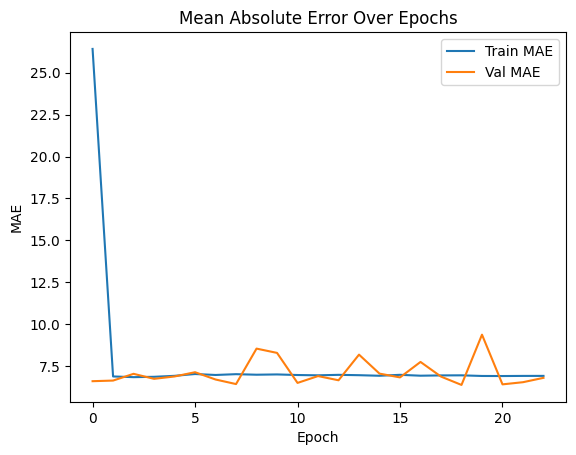

In [133]:
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Mean Absolute Error Over Epochs")
plt.legend()
plt.show()


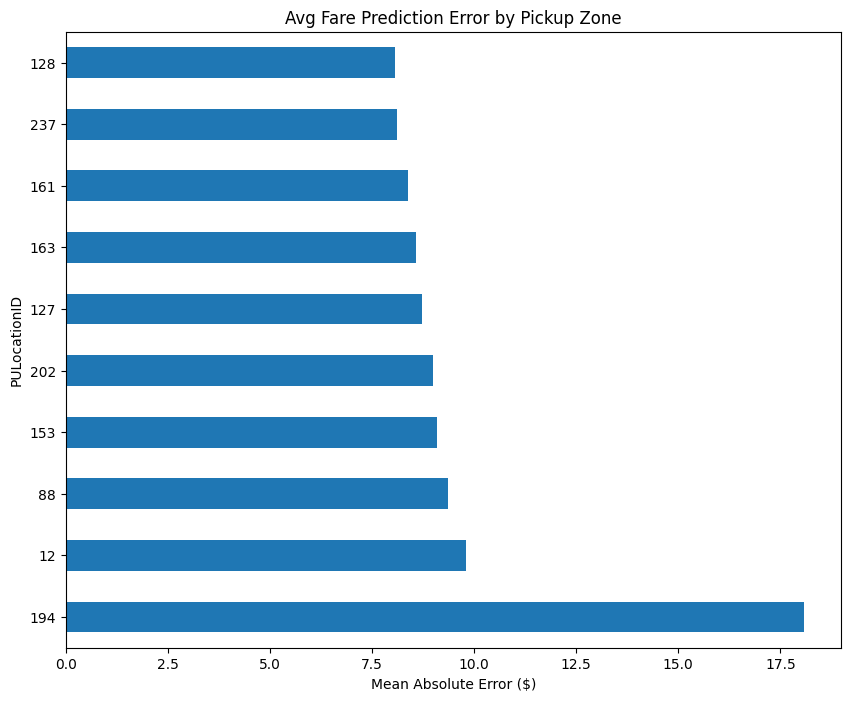

In [134]:
df_preds = X_test.copy()
df_preds['actual'] = y_test
df_preds['predicted'] = y_pred
df_preds['absolute_error'] = np.abs(y_pred - y_test)
zone_errors = df_preds.groupby('PULocationID')['absolute_error'].mean().sort_values(ascending=False)[:10]
zone_errors.plot(kind='barh', figsize=(10,8), title="Avg Fare Prediction Error by Pickup Zone")
plt.xlabel("Mean Absolute Error ($)")
plt.show()
